# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("Mouse_metadata.csv")
study_results_path = ("Study_results.csv")



In [163]:
# Read in the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head

<bound method NDFrame.head of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [164]:
# Read in the study results
study_results = pd.read_csv(study_results_path)
study_results.head

<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [4]:
# Combine the data into a single DataFrame
# Table 2 is on right
mouse_study = pd.merge(mouse_metadata, study_results, how="right", on =["Mouse ID", "Mouse ID"])
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice.
mice = mouse_study['Mouse ID'].unique()
mouse_count = len(mice)
print(mouse_count)


249


In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# go into mouse_study and get the loc of mouse_study duplicate and subset into mouse ID and timepoint by unique mouse ID
duplicate_mice = mouse_study.loc[mouse_study.duplicated(["Mouse ID", 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# go into mouse_study and get location of mice in mouse study with "Mouse ID" equal to the duplicate found above
duplicate_mice_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# go into mouse_study and get the Mouse ID of duplicated mouse that is in the duplicate mice
clean_mice = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
mice = clean_mice['Mouse ID'].unique()
mouse_count = len(mice)
print(mouse_count)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_mice = clean_mice.groupby(["Drug Regimen"])
print(grouped_mice)

grouped_mice.count().head(10)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [11]:
# mean, median, variance, standard deviation, and SEM of the tumor volume
mean = grouped_mice['Tumor Volume (mm3)'].mean()
median = grouped_mice['Tumor Volume (mm3)'].median()
variance = grouped_mice['Tumor Volume (mm3)'].var()
std_dev = grouped_mice['Tumor Volume (mm3)'].std()
sem = grouped_mice['Tumor Volume (mm3)'].sem()

# check columns
mean, median, variance, std_dev, sem

(Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.320930
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.446266
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.852013
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    4.994774
 Ceftamin     6.268188
 Infubinol    6.567243
 Ketapril     8.279709
 Na

In [12]:
# Assemble the resulting series into a single summary DataFrame.

Statistics = pd.DataFrame({"Tumor Vol (Mean)":mean,
                          "Tumor Vol (Median)":median,
                          "Tumor Vol (variance)":variance,
                          "Tumor Vol (std dev)":std_dev,
                          "Tumor Vol (sem)":sem,})
Statistics

,Tumor Vol (Mean),Tumor Vol (Median),Tumor Vol (variance),Tumor Vol (std dev),Tumor Vol (sem)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create Drug Regimen X Timepoints
mouse_count2 = grouped_mice["Drug Regimen"].value_counts()
mouse_count2

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

Text(0, 0.5, 'Mice Count')

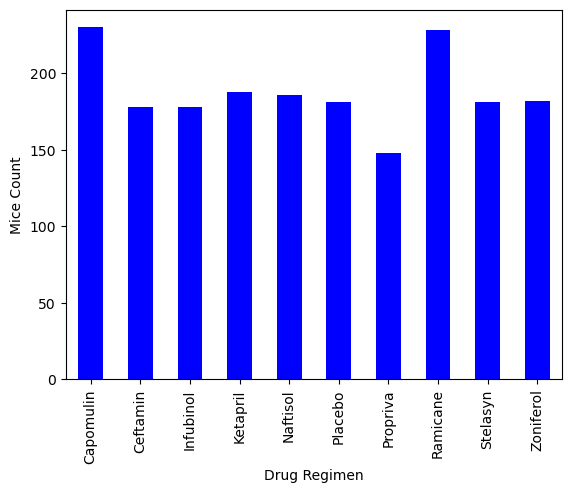

In [15]:
# Create the bar plot using Pandas
plot_mouse2 = mouse_count2.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

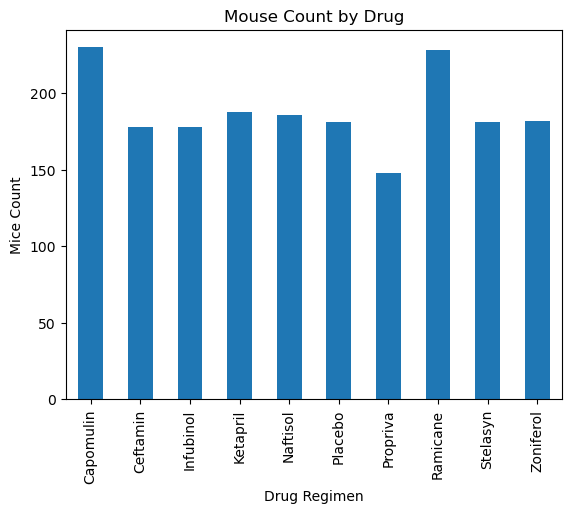

<Figure size 640x480 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_py_plot = mouse_count2.plot(kind="bar", title= "Mouse Count by Drug")
mouse_py_plot.set_xlabel("Drug Regimen")
mouse_py_plot.set_ylabel("Mice Count")
plt.show()
plt.tight_layout()

<Axes: ylabel='Sex'>

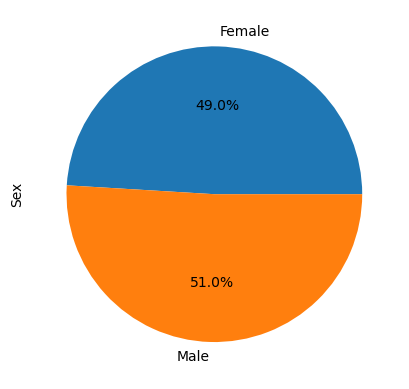

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create count of mice by sex 
mouse_by_sex = clean_mice.groupby(["Sex"])
mouse_by_sex
mouse_sex_count = mouse_by_sex["Sex"].count()
mouse_sex_count

# Pandas Plot
mouse_pie = mouse_sex_count
mouse_pie.plot.pie(autopct= "%1.1f%%")
#plt.show()

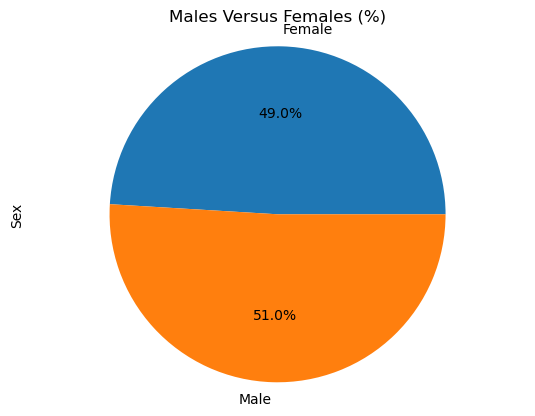

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_py_pie =mouse_sex_count.plot(kind="pie", y='Sex', autopct="%1.1f%%", title=("Males Versus Females (%)"))
mouse_py_pie.set_ylabel("Sex") 
                             
plt.axis("equal")
plt.show()
         

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Go into clean_mice and grab all mice that had one of the four treatments:
treat_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_med = clean_mice[clean_mice["Drug Regimen"].isin(treat_reg)]
mouse_med.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
29,c326,Infubinol,Female,18,25,0,45.0,0
30,c139,Infubinol,Male,11,28,0,45.0,0
31,v339,Infubinol,Male,20,26,0,45.0,0
32,a577,Infubinol,Female,6,25,0,45.0,0
33,y163,Infubinol,Female,17,27,0,45.0,0
34,k483,Infubinol,Female,20,30,0,45.0,0
35,k804,Infubinol,Female,23,29,0,45.0,0
36,o809,Infubinol,Male,3,25,0,45.0,0
37,z581,Infubinol,Female,24,25,0,45.0,0


In [144]:
# Start by getting the last (greatest) timepoint for each mouse
# Go into mouse_med and group on regimen and ID then aggregate on tumor 
last_timept = mouse_med.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timept = last_timept.stack(level=0).unstack(level=0)
last_timept.head
for drug in [treat_reg]:
    #print(drug)
    

<bound method NDFrame.head of Drug Regimen         Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                       
a203     tumor_size        NaN        NaN  67.973419        NaN
a251     tumor_size        NaN        NaN  65.525743        NaN
a275     tumor_size        NaN  62.999356        NaN        NaN
a411     tumor_size        NaN        NaN        NaN  38.407618
a444     tumor_size        NaN        NaN        NaN  43.047543
...                        ...        ...        ...        ...
y769     tumor_size        NaN  68.594745        NaN        NaN
y793     tumor_size  31.896238        NaN        NaN        NaN
y865     tumor_size        NaN  64.729837        NaN        NaN
z578     tumor_size        NaN        NaN        NaN  30.638696
z581     tumor_size        NaN        NaN  62.754451        NaN

[100 rows x 4 columns]>

In [107]:
# THIS WAS A HARD ONE, BUT I SURVIVED

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Med = 0
for drug in treat_reg:
    quartiles = last_timept[drug].quantile([.25,.5,.75]).round(2)
    lower_qt = quartiles[0.25].round(2)
    upper_qt = quartiles[0.75].round(2)
    IQR = round(upper_qt-lower_qt,2)
    u_boundary = round(upper_qt + (1.5*IQR),2)
    l_boundary = round(lower_qt - (1.5*IQR),2)
    
    
    if Med == 0:
        print(f"-----------------------------------------------------------------")
        print(f"Lower quartile of {drug} = {lower_qt}")
        print(f"Upper quartile of {drug} = {upper_qt}")
        print(f"IQR of {drug} = {IQR}")
        print(f"Values under {l_boundary} could be outliers in the {drug} cohort.")
        print(f"Values over {u_boundary} could be outliers in the {drug} cohort.")
        print(f"-----------------------------------------------------------------")
        Med+=0

-----------------------------------------------------------------
Lower quartile of Capomulin = 32.38
Upper quartile of Capomulin = 40.16
IQR of Capomulin = 7.78
Values under 20.71 could be outliers in the Capomulin cohort.
Values over 51.83 could be outliers in the Capomulin cohort.
-----------------------------------------------------------------
-----------------------------------------------------------------
Lower quartile of Ramicane = 31.56
Upper quartile of Ramicane = 40.66
IQR of Ramicane = 9.1
Values under 17.91 could be outliers in the Ramicane cohort.
Values over 54.31 could be outliers in the Ramicane cohort.
-----------------------------------------------------------------
-----------------------------------------------------------------
Lower quartile of Infubinol = 54.05
Upper quartile of Infubinol = 65.53
IQR of Infubinol = 11.48
Values under 36.83 could be outliers in the Infubinol cohort.
Values over 82.75 could be outliers in the Infubinol cohort.
------------------

In [66]:


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [168]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.




## Line and Scatter Plots

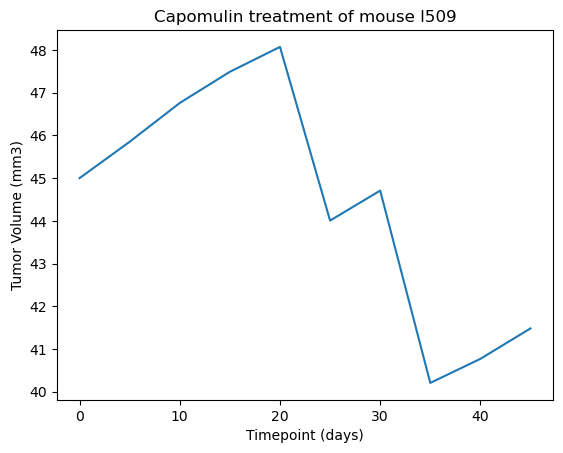

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


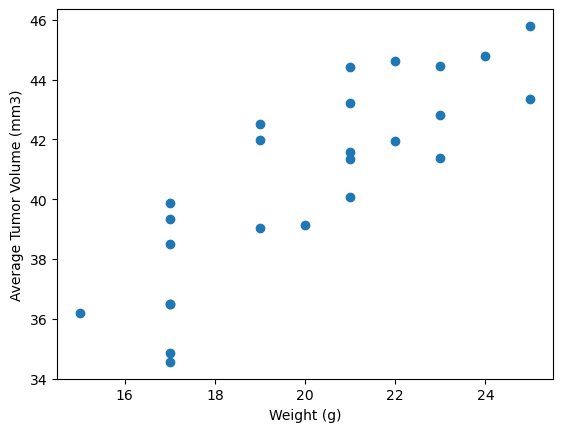

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


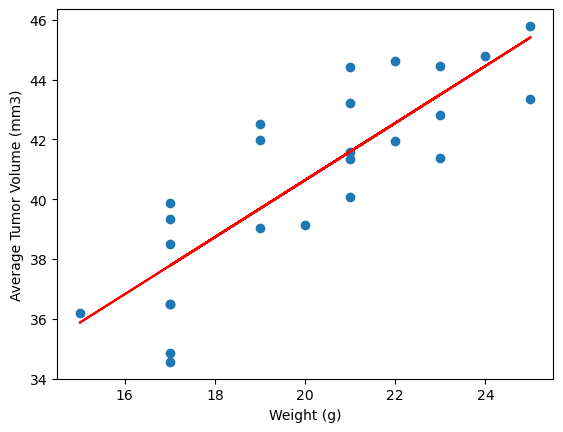

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
